In [41]:
import os
import math
import re
import statistics
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product

#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")
import gc

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

In [42]:
scaled_all_song_correlated_features_csv_path = '../correlated_csv/scaled_all_song_correlated_features_csv.csv'
scaled_bangladesh_song_correlated_features_csv_path = '../correlated_csv/scaled_bangladesh_song_correlated_features_csv.csv'
scaled_kolkata_song_correlated_features_csv_path = '../correlated_csv/scaled_kolkata_song_correlated_features_csv.csv'

In [43]:
corr_alls = pd.read_csv(scaled_all_song_correlated_features_csv_path)
corr_bd = pd.read_csv(scaled_bangladesh_song_correlated_features_csv_path)
corr_ind = pd.read_csv(scaled_kolkata_song_correlated_features_csv_path)

In [44]:
corr_fieldnames = [
                    'Country', 
                    'Song Name', 
                    'Popularity', 
                    'Time Signature', 
                    'Duration MS', 
                    'Tempo', 
                    'Valence', 
                    'Liveness', 
                    'Instrumentalness', 
                    'Acousticness', 'Speechiness', 
                    'Loudness', 
                    'Key', 
                    'Mode', 
                    'Energy', 
                    'Danceability', 
                    'Energy-Loudness', 
                    'Energy-Speechiness', 
                    'Energy-Valence', 
                    'Energy-Liveness', 
                    'Energy-Tempo', 
                    'Acousticness-Mode', 
                    'Acousticness-Instrumentalness', 
                    'Acousticness-Danceability', 
                    'Danceability-Valence', 
                    'Danceability-Key', 
                    'Danceability-Mode', 
                    'Danceability-Loudness', 
                    'Danceability-Time Signature', 
                    'Loudness-Speechiness', 
                    'Loudness-Valence', 
                    'Loudness-Liveness', 
                    'Loudness-Key', 
                    'Loudness-Mode', 
                    'Loudness-Tempo', 
                    'Loudness-Time Signature', 
                    'Loudness-Duration MS', 
                    'Valence-Speechiness', 
                    'Valence-Key', 
                    'Valence-Liveness', 
                    'Valence-Tempo', 
                    'Valence-Time Signature', 
                    'Speechiness-Liveness', 
                    'Speechiness-Tempo', 
                    'Liveness-Tempo', 
                    'Liveness-Key', 
                    'Instrumentalness-Mode', 
                    'Tempo-Duration MS', 
                    'Key-Mode', 
                    'Key-Duration MS', 
                    'Key-Time Signature', 
                    'Duration MS-Time Signature'
                   ]

In [45]:
corr_bd_popularity = corr_bd['Popularity']
corr_bd_time_signature = corr_bd['Time Signature']
corr_bd_duration_ms = corr_bd['Duration MS']
corr_bd_tempo = corr_bd['Tempo']
corr_bd_valencs = corr_bd['Valence']
corr_bd_livenss = corr_bd['Liveness']
corr_bd_instrumentalness = corr_bd['Instrumentalness']
corr_bd_acousticness = corr_bd['Acousticness']
corr_bd_speechiness = corr_bd['Speechiness']
corr_bd_loudness = corr_bd['Loudness']
corr_bd_key = corr_bd['Key']          
corr_bd_mode = corr_bd['Mode']
corr_bd_energy = corr_bd['Energy'] 
corr_bd_danceability = corr_bd['Danceability']

In [46]:
corr_ind_popularity = corr_ind['Popularity']
corr_ind_time_signature = corr_ind['Time Signature']
corr_ind_duration_ms = corr_ind['Duration MS']
corr_ind_tempo = corr_ind['Tempo']
corr_ind_valencs = corr_ind['Valence']
corr_ind_livenss = corr_ind['Liveness']
corr_ind_instrumentalness = corr_ind['Instrumentalness']
corr_ind_acousticness = corr_ind['Acousticness']
corr_ind_speechiness = corr_ind['Speechiness']
corr_ind_loudness = corr_ind['Loudness']
corr_ind_key = corr_ind['Key']          
corr_ind_mode = corr_ind['Mode']
corr_ind_energy = corr_ind['Energy'] 
corr_ind_danceability = corr_ind['Danceability'] 

In [47]:
def boxplot(data1,data2,y_label,x_label1,x_label2):
    plt.boxplot([data1, data2])
    
    mean1 = sum(data1) / len(data1)
    median1 = statistics.median(data1)
    mode1 = statistics.mode(data1)
    
    mean2 = sum(data2) / len(data2)
    median2 = statistics.median(data2)
    mode2 = statistics.mode(data2)
    
    print(x_label1,' : ',mean1,',',median1,',',mode1)
    print(x_label2,' : ',mean2,',',median2,',',mode2)
    # set the title and y-axis label
    plt.title('Comparison')
    plt.ylabel(y_label)

    # set x-axis labels
    plt.xticks([1, 2], [x_label1, x_label2])

    # display the plot
    plt.show()

Bangladesh  :  0.4597746963435359 , 0.4655436447166921 , 0.1424196018376722
Kolkata  :  0.5301768444901297 , 0.5329249617151608 , 0.3935681470137824


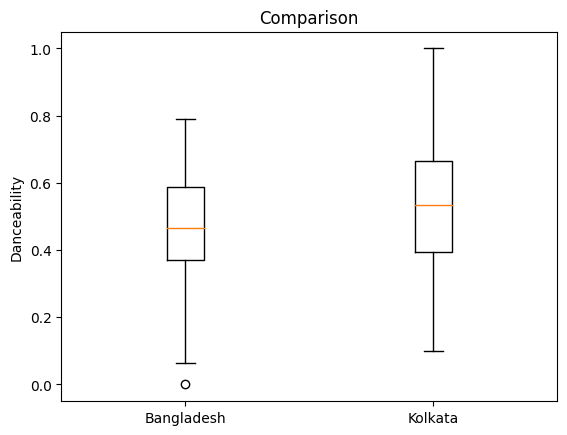

In [48]:
boxplot(corr_bd_danceability,corr_ind_danceability,'Danceability','Bangladesh','Kolkata')

Bangladesh  :  0.6064564820604157 , 0.6622867680958968 , 0.6645919778699863
Kolkata  :  0.5497167434017318 , 0.5435684647302905 , 0.9781005071461504


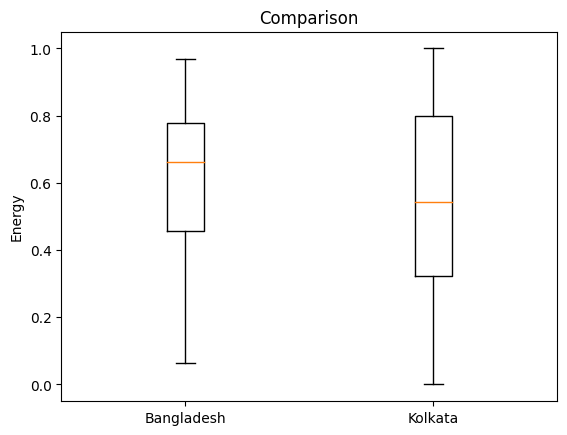

In [49]:
boxplot(corr_bd_energy,corr_ind_energy,'Energy','Bangladesh','Kolkata')

Bangladesh  :  0.6712328767123288 , 1.0 , 1.0
Kolkata  :  0.684931506849315 , 1.0 , 1.0


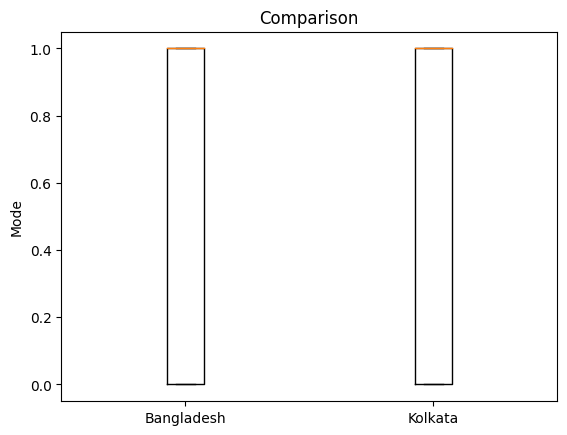

In [50]:
boxplot(corr_bd_mode,corr_ind_mode,'Mode','Bangladesh','Kolkata')

Bangladesh  :  0.4744707347447073 , 0.5454545454545454 , 0.0909090909090909
Kolkata  :  0.5105853051058531 , 0.4545454545454546 , 0.8181818181818182


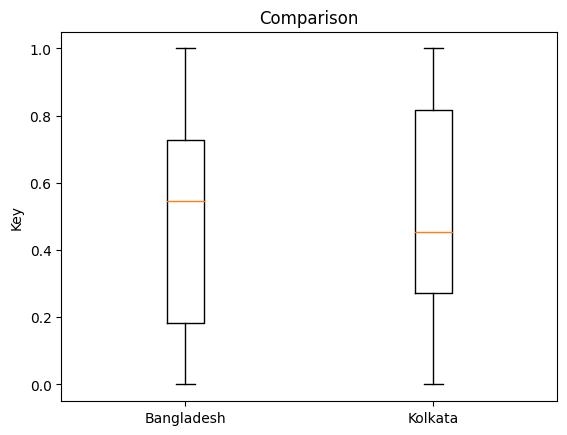

In [51]:
boxplot(corr_bd_key,corr_ind_key,'Key','Bangladesh','Kolkata')

Bangladesh  :  0.6894285318942851 , 0.7294823232323233 , 0.5167824074074074
Kolkata  :  0.6256500507356674 , 0.6593013468013469 , 0.7999789562289563


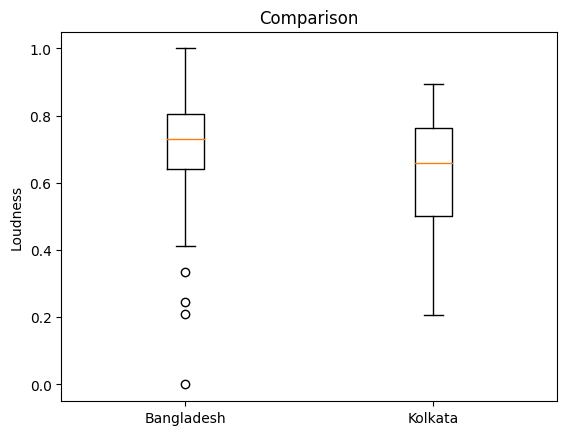

In [52]:
boxplot(corr_bd_loudness,corr_ind_loudness,'Loudness','Bangladesh','Kolkata')

Bangladesh  :  0.13879595143404239 , 0.075268817204301 , 0.0145929339477726
Kolkata  :  0.13246217620941433 , 0.0821812596006144 , 0.1021505376344086


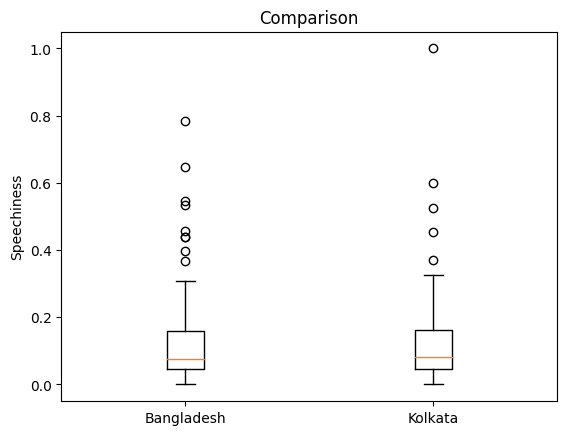

In [53]:
boxplot(corr_bd_speechiness,corr_ind_speechiness,'Speechiness','Bangladesh','Kolkata')

Bangladesh  :  0.2654540939938487 , 0.102873791544248 , 0.0285933875872465
Kolkata  :  0.36915579198226695 , 0.2860027652886562 , 0.9300406167717992


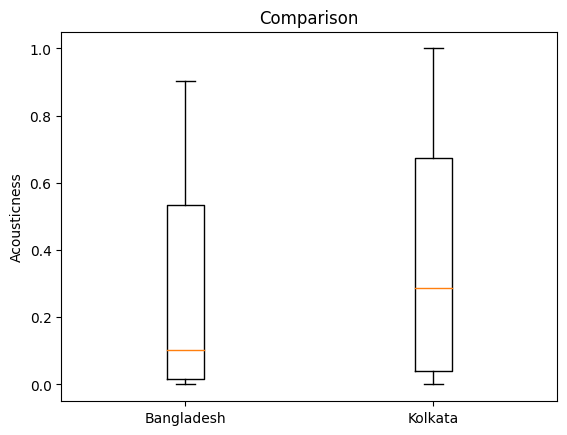

In [54]:
boxplot(corr_bd_acousticness,corr_ind_acousticness,'Acousticness','Bangladesh','Kolkata')

Bangladesh  :  0.02619483012150761 , 4.293785310734463e-05 , 0.0
Kolkata  :  0.0017785063075613193 , 1.845574387947269e-05 , 0.0


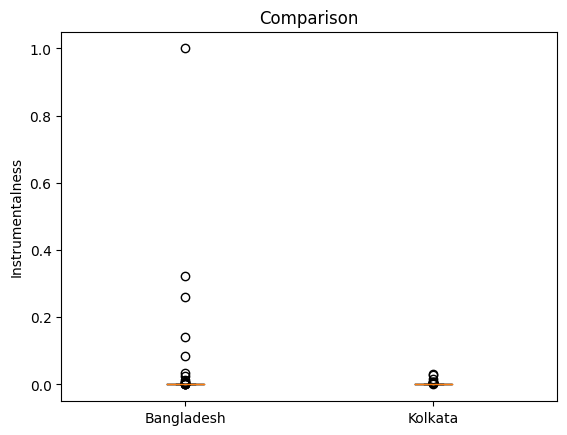

In [55]:
boxplot(corr_bd_instrumentalness,corr_ind_instrumentalness,'Instrumentalness','Bangladesh','Kolkata')

Bangladesh  :  0.18909242717374172 , 0.1165658721688604 , 0.0928495197438633
Kolkata  :  0.168282140124657 , 0.1094509664413612 , 0.0845487963951144


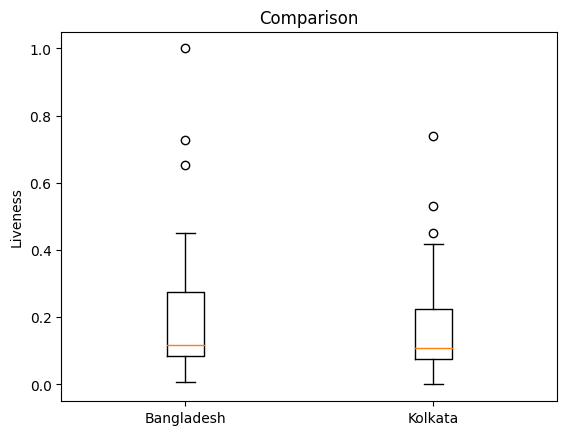

In [56]:
boxplot(corr_bd_livenss,corr_ind_livenss,'Liveness','Bangladesh','Kolkata')

Bangladesh  :  0.401122097795718 , 0.3633864760857614 , 0.4304562946673997
Kolkata  :  0.4308704918403156 , 0.3930731170973062 , 0.4370533260032986


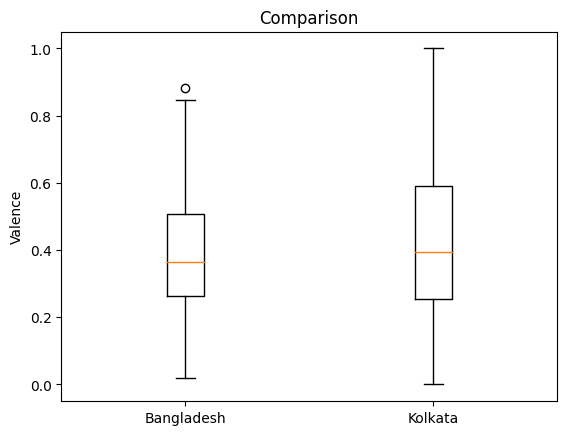

In [57]:
boxplot(corr_bd_valencs,corr_ind_valencs,'Valence','Bangladesh','Kolkata')

Bangladesh  :  0.46419597679871627 , 0.4873791973791973 , 0.6091564291564292
Kolkata  :  0.417424410712082 , 0.4706224406224407 , 0.5199999999999999


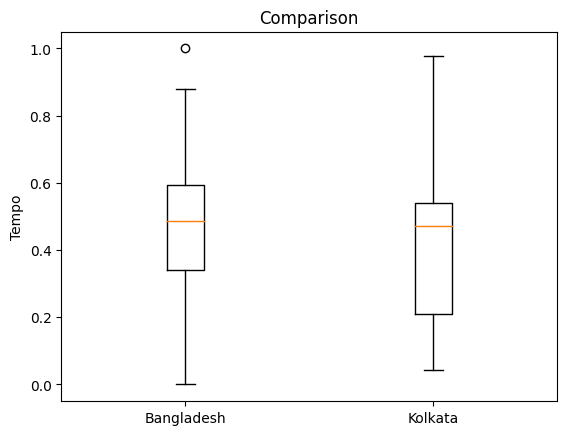

In [58]:
boxplot(corr_bd_tempo,corr_ind_tempo,'Tempo','Bangladesh','Kolkata')

Bangladesh  :  0.1810198027846971 , 0.1694484990010702 , 0.2881915464871281
Kolkata  :  0.18710154995118533 , 0.1815398275962562 , 0.2976525460617613


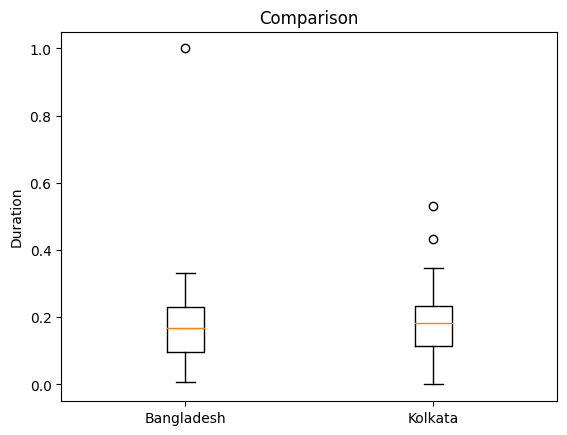

In [59]:
boxplot(corr_bd_duration_ms,corr_ind_duration_ms,'Duration','Bangladesh','Kolkata')

Bangladesh  :  0.3835616438356164 , 0.5 , 0.5
Kolkata  :  0.4589041095890411 , 0.5 , 0.5


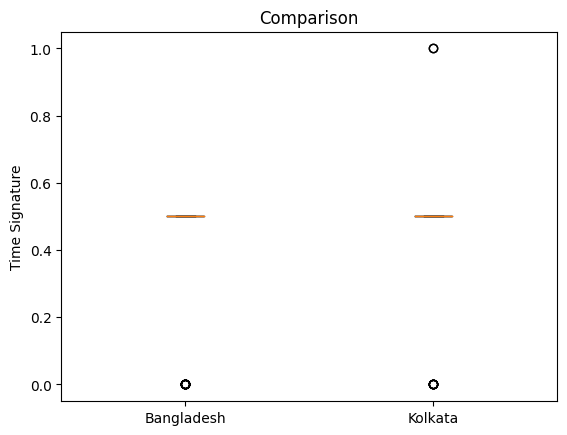

In [60]:
boxplot(corr_bd_time_signature,corr_ind_time_signature,'Time Signature','Bangladesh','Kolkata')

Bangladesh  :  0.6114570361145704 , 0.5681818181818182 , 0.5454545454545454
Kolkata  :  0.4573474470734744 , 0.4545454545454546 , 0.5454545454545454


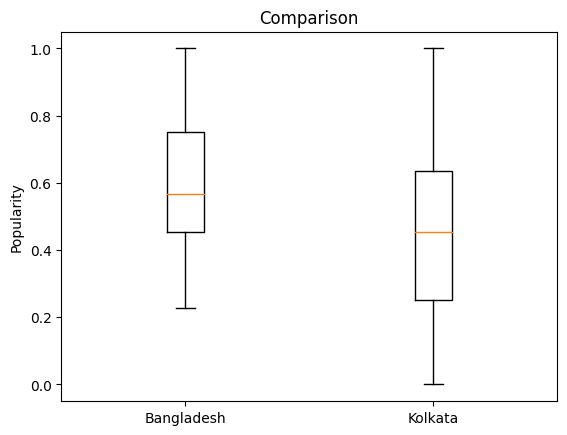

In [61]:
boxplot(corr_bd_popularity,corr_ind_popularity,'Popularity','Bangladesh','Kolkata')

In [62]:
corr_bd_acous_mode = corr_bd[corr_fieldnames[21]]
corr_bd_acous_instru = corr_bd[corr_fieldnames[22]]
corr_bd_dance_mode = corr_bd[corr_fieldnames[26]]
corr_bd_loud_mode = corr_bd[corr_fieldnames[33]]
corr_bd_instru_mode = corr_bd[corr_fieldnames[46]]

In [63]:
corr_ind_acous_mode = corr_ind[corr_fieldnames[21]]
corr_ind_acous_instru = corr_ind[corr_fieldnames[22]]
corr_ind_dance_mode = corr_ind[corr_fieldnames[26]]
corr_ind_loud_mode = corr_ind[corr_fieldnames[33]]
corr_ind_instru_mode = corr_ind[corr_fieldnames[46]]

Bangladesh  :  0.20066865194146014 , 0.0133669335905204 , 0.0
Kolkata  :  0.25605313247050715 , 0.0453630632728299 , 0.0


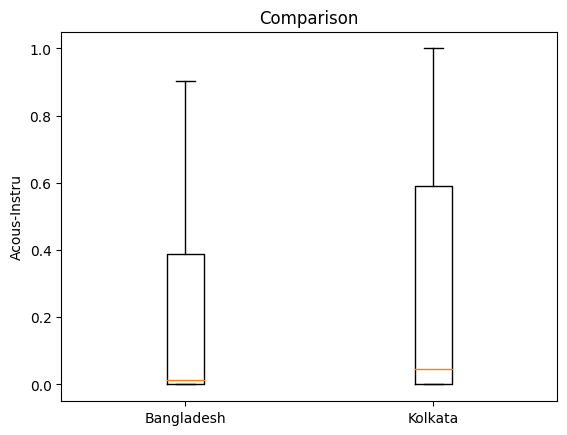

In [64]:
boxplot(corr_bd_acous_mode,corr_ind_acous_mode,'Acous-Instru','Bangladesh','Kolkata')

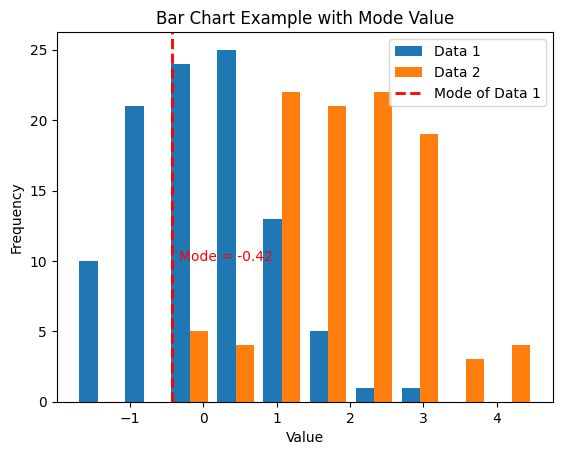

In [65]:
data1 = np.random.normal(loc=0, scale=1, size=100)
data2 = np.random.normal(loc=2, scale=1, size=100)

# calculate the mode of data1
mode_val = statistics.mode(data1)

# create a histogram of data1 and data2
plt.hist([data1, data2], bins=10, label=['Data 1', 'Data 2'])

# annotate the mode value on the chart
plt.axvline(mode_val, color='r', linestyle='--', linewidth=2, label='Mode of Data 1')
plt.annotate('Mode = {:.2f}'.format(mode_val), xy=(mode_val + 0.1, 10), color='r')

# set the title and x/y-axis labels
plt.title('Bar Chart Example with Mode Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# display the plot
plt.show()
